<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/main/Demos/Ch2_FixedPointPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fixed Point iteration (and cobweb plots)

See [cobweb plot on wikipedia](https://en.wikipedia.org/wiki/Cobweb_plot), sometimes called a spider diagram

You can plot these via Python, but to make them nice and interactive is a bit of work (`matplotlib.animation.FuncAnimation` can do it, but you have to be quite proficient with Python and matplotlib).

For this demo, I recommend that you use [this geogebra online cobweb plot](https://www.geogebra.org/m/uvsfvNDt) or one of the varios Desmos apps (e.g., [Logistic Functino Cobweb Diagram](https://www.desmos.com/calculator/ktsps2nrhi)) which are quite simple and runs on most modern web browsers.

We'll look at 5 different fixed-point reformulations of the same root-finding problem
$$f(x) = x^3 + 4x^2 - 10, \text{ find } f(x)=0$$
within the interval $[1,2]$

where we now solve the fixed point equation $$g(x)=x$$ for:
$$\begin{aligned}
g_1(x) &= x - x^3 - 4x^2+10\\\\
g_2(x) &= \sqrt{\frac{10}{x}-4x}\\\\
g_3(x) &= \frac{1}{2}\sqrt{10-x^3}\\\\
g_4(x) &= \sqrt{\frac{10}{4+x}}\\\\
g_5(x) &= x - \frac{x^3+4x^2-10}{3x^2+8x}
\end{aligned}
$$

These are in the book in Table 2.2.

The goal of this demo is:
1. Learn how to use and interpret a cobweb plot
2. Predict which of the fixed point formulations will converge (hint: plot their deriviative)
3. Check your predictions with the cobweb plot

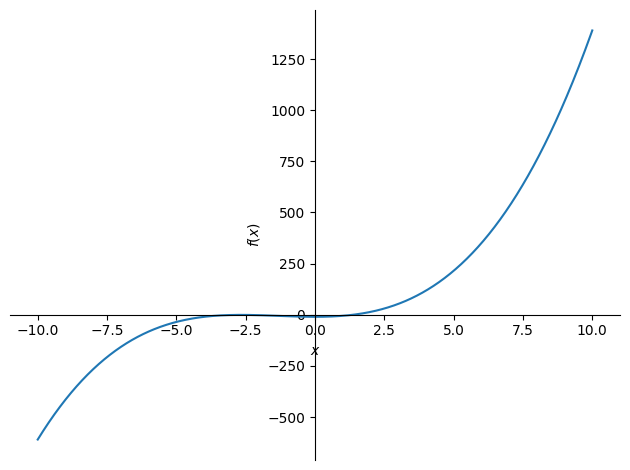

In [19]:
import math
import numpy as np
from sympy import init_printing
init_printing()

# from sympy import symbols, maximum, minimum, sqrt, diff, lambdify, Function, Interval, Abs
import sympy
from sympy.plotting import plot

x = sympy.symbols('x')
f, fprime = sympy.symbols('f fprime',cls=sympy.Function)

f = x**3 + 4*x**2 - 10
plot( f, (x,-10,10))

In [20]:
from scipy.optimize import root_scalar
f_numeric = sympy.lambdify(x,f) # from SymPy
output = root_scalar( f_numeric, x0 = 1.5, x1 = 1.4)
output

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 1.3652300134140967
         method: secant

In [21]:
# The fix point iteration is very simple.  Not having any error checking or convergence checks,
# in order to focus on the algorihtm itself, the following is an implementation
def fixedPointIter( f, x0, maxIter ):
  p = x0 # if a numpy array, then do x0.copy()
  for i in range(maxIter):
    p = f(p)
    print("Iter {:3d}, guess is {:12.9f}".format(i,p))
  return p

p = fixedPointIter( lambda x : .5*math.sqrt(10-x**3), 1.5, 10 ) # or np.sqrt
p

Iter   0, guess is  1.286953768
Iter   1, guess is  1.402540804
Iter   2, guess is  1.345458374
Iter   3, guess is  1.375170253
Iter   4, guess is  1.360094193
Iter   5, guess is  1.367846968
Iter   6, guess is  1.363887004
Iter   7, guess is  1.365916733
Iter   8, guess is  1.364878217
Iter   9, guess is  1.365410061


1.365410061169957

## Formulation 1
$$g_1(x) = x - x^3 - 4x^2+10$$

In [22]:
g1 = x - x**3 - 4*x**2+10
g1

   3      2         
- x  - 4⋅x  + x + 10

In [23]:
g1Prime = sympy.diff(g1)
g1Prime

     2          
- 3⋅x  - 8⋅x + 1

In [26]:
# We can see that this is NOT contractive in the interval
sympy.minimum( g1Prime, x, sympy.Interval(1,2) ), sympy.maximum( g1Prime, x, sympy.Interval(1,2) )

(-27, -10)

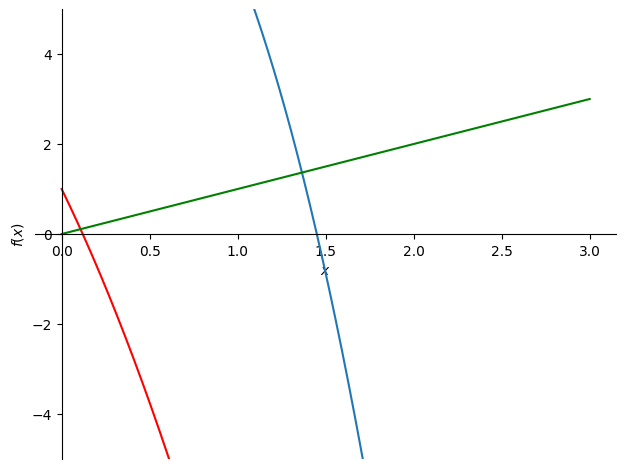

In [25]:
plt1 = plot( g1, (x,0,3), ylim = (-5,5), show=False )
plt2 = plot( g1Prime, (x,0,3), show=False , line_color='red')
plt3 = plot( x, (x,0,3), show=False , line_color='green')
plt1.append( plt2[0] )
plt1.append( plt3[0] )
#ax.axis('equal') # equal aspect ratio, so 45 degree line looks like 45 degrees
plt1.show()

## Formulation 2
$$g_2(x) = \sqrt{\frac{10}{x}-4x}$$

In [27]:
g2 = sympy.sqrt( 10/x-4*x )
g2

    ___________
   ╱        10 
  ╱  -4⋅x + ── 
╲╱          x  

In [28]:
g2Prime = sympy.diff(g2)
g2Prime

         5     
    -2 - ──    
          2    
         x     
───────────────
    ___________
   ╱        10 
  ╱  -4⋅x + ── 
╲╱          x  

In [33]:
sympy.minimum( g2Prime, x, sympy.Interval(1,2) ), sympy.maximum( g2Prime, x, sympy.Interval(1,2) ).evalf()

(-∞, -2.82868888288256)

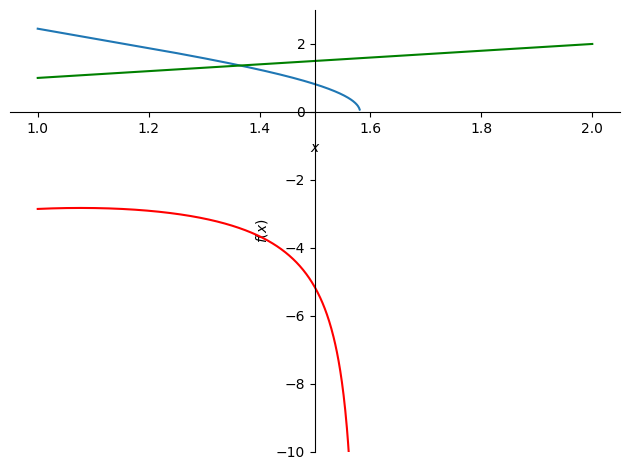

In [24]:
plt1 = plot( g2, (x,1,2), ylim = (-10,3), show=False )
plt2 = plot( g2Prime, (x,1,2), show=False , line_color='red')
plt3 = plot( x, (x,1,2), show=False , line_color='green')
plt1.append( plt2[0] )
plt1.append( plt3[0] )
#ax.axis('equal') # equal aspect ratio, so 45 degree line looks like 45 degrees
plt1.show()

## Formulation 3
$$g_3(x) = \frac{1}{2}\sqrt{10-x^3}$$

In [34]:
g3 = 1/2*sympy.sqrt(10-x**3)
g3

       _________
      ╱       3 
0.5⋅╲╱  10 - x  

In [35]:
g3Prime = sympy.diff(g3)
g3Prime

        2   
 -0.75⋅x    
────────────
   _________
  ╱       3 
╲╱  10 - x  

In [37]:
sympy.minimum( g3Prime, x, sympy.Interval(1,2) ).evalf(), sympy.maximum( g3Prime, x, sympy.Interval(1,2) )

(-2.12132034355964, -0.25)

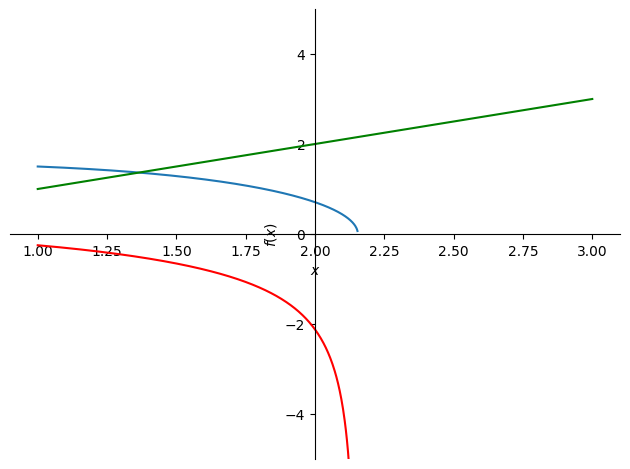

In [27]:
plt1 = plot( g3, (x,1,3), ylim = (-5,5), show=False )
plt2 = plot( g3Prime, (x,1,3), show=False , line_color='red')
plt3 = plot( x, (x,1,3), show=False , line_color='green')
plt1.append( plt2[0] )
plt1.append( plt3[0] )
plt1.show()

## Formulation 4
$$g_4(x) = \sqrt{\frac{10}{4+x}}$$

In [38]:
g4 = sympy.sqrt(10/(4+x))
g4

        _______
       ╱   1   
√10⋅  ╱  ───── 
    ╲╱   x + 4 

In [39]:
g4Prime = sympy.diff(g4)
g4Prime

         _______ 
        ╱   1    
-√10⋅  ╱  ─────  
     ╲╱   x + 4  
─────────────────
    2⋅(x + 4)    

In [41]:
sympy.minimum( g4Prime, x, sympy.Interval(1,2) ).evalf(), sympy.maximum( g4Prime, x, sympy.Interval(1,2) ).evalf()

(-0.14142135623731, -0.107582870727984)

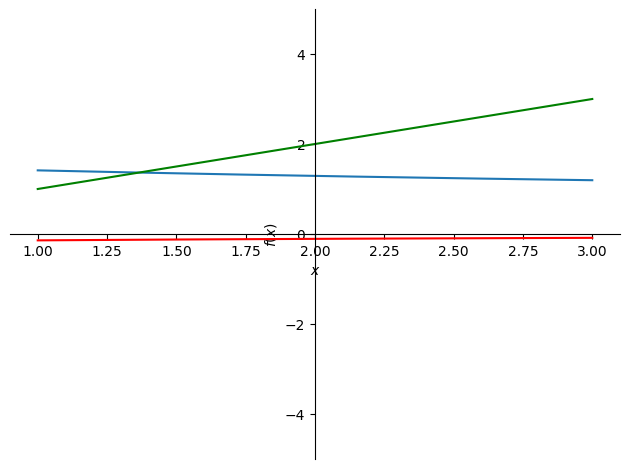

In [30]:
plt1 = plot( g4, (x,1,3), ylim = (-5,5), show=False )
plt2 = plot( g4Prime, (x,1,3), show=False , line_color='red')
plt3 = plot( x, (x,1,3), show=False , line_color='green')
plt1.append( plt2[0] )
plt1.append( plt3[0] )
plt1.show()

## Formulation 5
$$g_5(x) = x - \frac{x^3+4x^2-10}{3x^2+8x}$$

In [42]:
g5 = x - (x**3+4*x**2-10)/(3*x**2+8*x)
g5

     3      2     
    x  + 4⋅x  - 10
x - ──────────────
         2        
      3⋅x  + 8⋅x  

In [43]:
g5Prime = sympy.diff(g4)
g5Prime

         _______ 
        ╱   1    
-√10⋅  ╱  ─────  
     ╲╱   x + 4  
─────────────────
    2⋅(x + 4)    

In [45]:
sympy.minimum( g5Prime, x, sympy.Interval(1,2) ).evalf(), sympy.maximum( g5Prime, x, sympy.Interval(1,2) ).evalf()

(-0.14142135623731, -0.107582870727984)

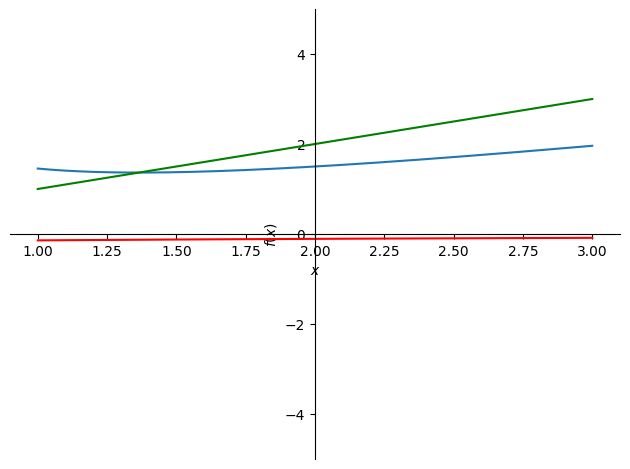

In [33]:
plt1 = plot( g5, (x,1,3), ylim = (-5,5), show=False )
plt2 = plot( g5Prime, (x,1,3), show=False , line_color='red')
plt3 = plot( x, (x,1,3), show=False , line_color='green')
plt1.append( plt2[0] )
plt1.append( plt3[0] )
plt1.show()